# Task1: Fashion MNIST

## 목차
1. Data Check  
    1.1 data info  
    1.2 data split: test,train  
2. Data Scaling(+SVM)    
    2.1 RobustScaler      
    2.2 StandardScaler     
    2.3 MinMaxScaler         
    2.4 MaxAbsScaler  
    2.5 SVM 이용한 결과분석
3. Feature Extraction  
    3.1 PCA      
    3.2 LDA           
    3.3 MDS                   
    3.4 T-SNE                  
4. Model      
    4.1 Bayes              
    4.2 K-NN                 
    4.3 MLP                        
    4.4 CNN                       
    4.5 AutoEncoder    

# 1. Data Check

## 1.1 Data info

In [1]:
import pandas as pd
import  numpy  as  np 
import matplotlib.pyplot as plt

In [86]:
train=pd.read_csv('fMNIST_AI2021.csv',header=None) #다른 헤더 정보없어서 None
train.rename(columns = {0 : 'label'}, inplace = True) #label이란것 알기 쉽게 column명 수정
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, label to 784
dtypes: int64(785)
memory usage: 29.9 MB


In [59]:
len(train['label'].unique()) #라벨 수

5

In [4]:
train['label'].value_counts() #라벨 마다 데이터 수

4    1000
1    1000
5    1000
2    1000
3    1000
Name: label, dtype: int64

## 1.2 Data split
pca와 lda를 위해 데이터를 정렬하고, train과 test set을 8:2 로 나누어 주었습니다.

In [87]:
train=np.array(train)
train = train[train[:,0].argsort(kind='mergesort')] # pca와 lda를 위한 데이터 정렬
train_x=train[:,1:] # data value
train_y=train[:,0] # label
X=train_x # all x data
Y=train_y # all y data
N=train_x.shape[0] # number of data
print(N)
print(train_y) #정렬 됨을 확인가능

5000
[1 1 1 ... 5 5 5]


In [88]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=19) 

# 2. Data Scaling
데이터 스케일링에는 여러가지 종류가 있는데, 일반적으로 아래와 같습니다.그 중 MinMax(0-1)scaling의 경우 Nomalization(정규화), Standard scaling의 경우엔 Standardization(표준화)라고 합니다. 
- robust 
- standard 
- MinMaxScaler
- MaxAbsScaler

모든 Scaling은 test data가 포함된 전체 dataset이 아닌 오로지 train data에 대해서만 fit되어야합니다. 이후 train data와 test data 각각을 스케일링합니다.모델이 학습을 하는 과정에서 어떠한 방식으로든 test data를 사용하게 되어서는 안됩니다. 이 점 유의하며 스케일링 하지 않은 것으로 정확도를 측정해보겠습니다. base model은 scaling에 민감한 SVM로 지정하였습니다

In [7]:
#스케일링 안한 것
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_x,train_y)
print('test accuracy: %.3f' %(svc.score(test_x,test_y)))

test accuracy: 0.921


## 2.1 RobustScaler
각 특성들의 중앙값을 0, IQR(제3사분위수-제1사분위수,Q3-Q1)을 1로 스케일링합니다. StandardScaler와 비슷하지만, 이상치의 영향을 최소화합니다.

In [8]:
from sklearn.preprocessing import RobustScaler

# 중앙값 0 / IQR 1
scaler = RobustScaler()
train_x_scaler = scaler.fit_transform(train_x)
test_x_scaler = scaler.transform(test_x)

In [9]:
#스케일링 한 것
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_x_scaler,train_y)
print('RobustScaler test accuracy: %.3f' %(svc.score(test_x_scaler,test_y)))

RobustScaler test accuracy: 0.713


## 2.2 StandardScaler
각 특성의 평균을 0, 분산을 1로 스케일링합니다. 
즉 데이터를 정규분포로 만듭니다. 하한값과 상한값이 존재하지 않을 수 있기에, 어떤 알고리즘에서는 문제가 있을 수 있습니다. 
회귀보다 분류에 유용합니다.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaler = scaler.fit_transform(train_x)
test_x_scaler = scaler.transform(test_x)

In [11]:
#스케일링 한 것
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_x_scaler,train_y)
print('StandardScaler test accuracy: %.3f' %(svc.score(test_x_scaler,test_y)))

StandardScaler test accuracy: 0.914


## 2.3 MinMaxScaler(a,b)
각 특성의 하한값을 a, 상한값을 b로 스케일링합니다. a=0, b=1일 경우 Normalization으로 표기할 때도 있습니다. 분류보다 회귀에 유용합니다.

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalization 최소값 0 / 최대값 1
scaler = MinMaxScaler()
train_x_scaler = scaler.fit_transform(train_x)
test_x_scaler = scaler.transform(test_x)

In [13]:
#스케일링 한 것
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_x_scaler,train_y)
print('MinMax Scaler test accuracy: %.3f' %(svc.score(test_x_scaler,test_y)))

MinMax Scaler test accuracy: 0.921


## 2.4 MaxAbsScaler
각 특성을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.

In [14]:
from sklearn.preprocessing import MaxAbsScaler

# 절대값
scaler = MaxAbsScaler()
train_x_scaler = scaler.fit_transform(train_x)
test_x_scaler = scaler.transform(test_x)

In [15]:
#스케일링 한 것
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_x_scaler,train_y)
print('MaxAbs Scaler test accuracy: %.3f' %(svc.score(test_x_scaler,test_y)))

MaxAbs Scaler test accuracy: 0.921


dataset이 양수값을 가지고 있었기에 MaxAbs와 MinMaxScaler값이 같음을확인할 수 있습니다.

Scaling 분석결과 한 결과 한거나 안한거나 똑같거나, 오히려 안좋아지기도 해, 스케일링은 굳이 하지 않기로 했습니다.

# 3. Feature Extraction

## 3.1 PCA
Unsupervised learning(비지도 학습)의 일종으로, 독립변수들 사이에 correlation을 없애고, 숨은 latent variable을 찾아내거나, 노이즈(noise)를 줄일 때 사용합니다.

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

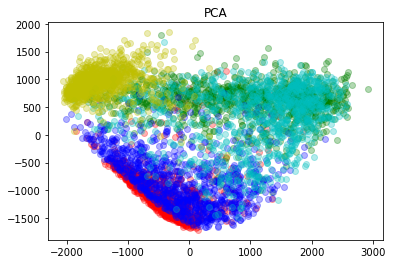

In [51]:
pca=PCA(n_components=2) #2차원으로 줄임
z_pca=pca.fit_transform(X) 
plt.title('PCA')
#아래는 출력
plt.scatter(np.array(z_pca[0:1000,0]), np.array(z_pca[0:1000,1]), c='r', alpha=0.3)
plt.scatter(np.array(z_pca[1000:2000,0]), np.array(z_pca[1000:2000,1]), c='g', alpha=0.3)
plt.scatter(np.array(z_pca[2000:3000,0]), np.array(z_pca[2000:3000,1]), c='b', alpha=0.3)
plt.scatter(np.array(z_pca[3000:4000,0]), np.array(z_pca[3000:4000,1]), c='c', alpha=0.3)
plt.scatter(np.array(z_pca[4000:5000,0]), np.array(z_pca[4000:5000,1]), c='y', alpha=0.3)

## 3.2 LDA
LDA는 Classification과 Dimensional Reduction(차원 축소)까지 동시에 사용하는 알고리즘입니다.LDA는 지도학습으로서 label값도 학습시킬 것 입니다. LDA에서의 핵심은 classification을 할 때 클래스 내의 분산은 최소가 되도록 하되, 클래스끼리의 분산은 최대가 되도록 한다는 것입니다. 이 말은 즉슨, LDA를 통해 하나의 축으로transformation(변형)된 데이터들이 같은 클래스 내에는 그 값의 차가 최소가 되도록하며, 다른 클래스끼리는 그 값이 차가 크게 하는 축을 찾는 것입니다.

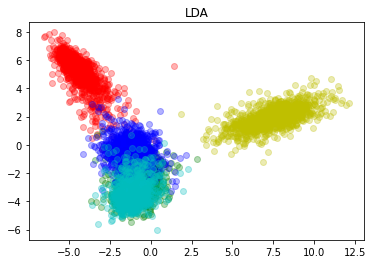

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=2)
z_lda=lda.fit_transform(X,Y) #지도학습
plt.title('LDA')
#아래는 출력
plt.scatter(np.array(z_lda[0:1000,0]), np.array(z_lda[0:1000,1]), c='r', alpha=0.3)
plt.scatter(np.array(z_lda[1000:2000,0]), np.array(z_lda[1000:2000,1]), c='g', alpha=0.3)
plt.scatter(np.array(z_lda[2000:3000,0]), np.array(z_lda[2000:3000,1]), c='b', alpha=0.3)
plt.scatter(np.array(z_lda[3000:4000,0]), np.array(z_lda[3000:4000,1]), c='c', alpha=0.3)
plt.scatter(np.array(z_lda[4000:5000,0]), np.array(z_lda[4000:5000,1]), c='y', alpha=0.3)

## 3.3 MDS

In [77]:
from sklearn.manifold import MDS
mds=MDS(n_components=2) #2차원축소
z_mds=mds.fit_transform(X)
plt.title('MDS')
#아래는 출력
plt.scatter(np.array(z_mds[0:1000,0]), np.array(z_mds[0:1000,1]), c='r', alpha=0.3)
plt.scatter(np.array(z_mds[1000:2000,0]), np.array(z_mds[1000:2000,1]), c='g', alpha=0.3)
plt.scatter(np.array(z_mds[2000:3000,0]), np.array(z_mds[2000:3000,1]), c='b', alpha=0.3)
plt.scatter(np.array(z_mds[3000:4000,0]), np.array(z_mds[3000:4000,1]), c='c', alpha=0.3)
plt.scatter(np.array(z_mds[4000:5000,0]), np.array(z_mds[4000:5000,1]), c='y', alpha=0.3)

KeyboardInterrupt: 

## 3.4 t-SNE

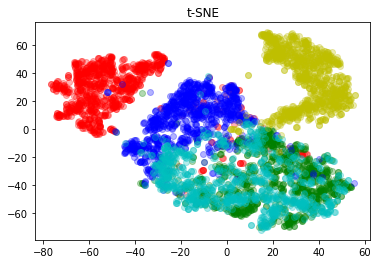

In [76]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2) #2차원축소
z_tsne=tsne.fit_transform(X)
plt.title('t-SNE')
#아래는 출력
plt.scatter(np.array(z_tsne[0:1000,0]), np.array(z_tsne[0:1000,1]), c='r', alpha=0.3)
plt.scatter(np.array(z_tsne[1000:2000,0]), np.array(z_tsne[1000:2000,1]), c='g', alpha=0.3)
plt.scatter(np.array(z_tsne[2000:3000,0]), np.array(z_tsne[2000:3000,1]), c='b', alpha=0.3)
plt.scatter(np.array(z_tsne[3000:4000,0]), np.array(z_tsne[3000:4000,1]), c='c', alpha=0.3)
plt.scatter(np.array(z_tsne[4000:5000,0]), np.array(z_tsne[4000:5000,1]), c='y', alpha=0.3)

## PCA 적용

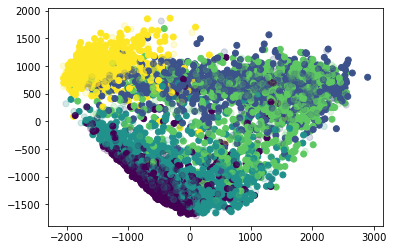

In [21]:
#pca
n_components = 20 #Set Feature Dimention

pca = PCA(n_components=n_components)
pca.fit(train_x) #Obtain Transformation Matrix through learning

z_pca_train = pca.transform(train_x) # Obtain Training Feature Set (4000X20)
z_pca_test = pca.transform(test_x) # Obtain Test Feature Set (1000X20)

#Scatter plot for the first two dimensional feature vectors
# 첫번째 두번째 차원만 돌림. 
plt.scatter(np.array(z_pca_train[:,0]), np.array(z_pca_train[:,1]), c=train_y, alpha=1.0)
plt.scatter(np.array(z_pca_test[:,0]), np.array(z_pca_test[:,1]), c=test_y, alpha=0.2)

## LDA적용

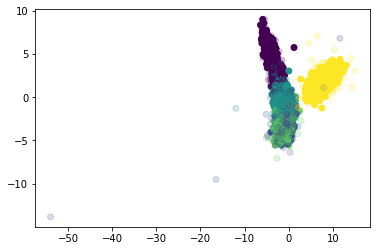

In [22]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=4) #4차원
lda.fit(train_x,train_y)

z_lda_train = lda.transform(train_x)
z_lda_test = lda.transform(test_x)

plt.scatter(np.array(z_lda_train[:,0]), np.array(z_lda_train[:,1]), c=train_y, alpha=1.0)
plt.scatter(np.array(z_lda_test[:,0]), np.array(z_lda_test[:,1]), c=test_y, alpha=0.2)

# 4. Modeling

## 4.1 Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

#Classification for raw input data
model.fit(train_x,train_y)
y_Bayes = model.predict(test_x)

#y_Bayes: 분류결과 
print('Bayes Classification error:',np.sum(np.abs(y_Bayes - test_y)>0)/test_y.shape[0])

# Classification for pca input feature
model.fit(z_pca_train, train_y)
y_pca_Bayes = model.predict(z_pca_test)
print('PCA: Classification error:',np.sum(np.abs(y_pca_Bayes - test_y)>0)/test_y.shape[0])

# Classification for lda input feature
model.fit(z_lda_train, train_y)
y_lda_Bayes = model.predict(z_lda_test)
print('LDA: Classification error:',np.sum(np.abs(y_lda_Bayes - test_y)>0)/test_y.shape[0])

Classification error: 0.287
PCA: Classification error: 0.114
LDA: Classification error: 0.109


## 4.2 K-NN Classifier

In [70]:
#Classificatiokn Using K-NN Classifier
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
# cross-validation library
from sklearn.model_selection import cross_val_score

k_range = range(1,100)              # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_scores = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn,train_x,train_y,cv=10,scoring = "accuracy") # 10-fold cross-validation
    k_scores.append(scores.mean())  # 10-fold 각각 정확도의 평균으로 성능계산 

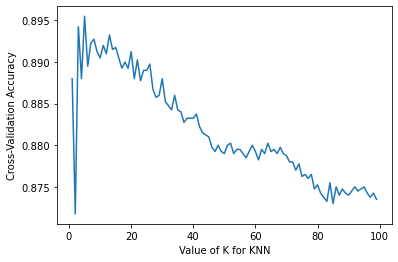

In [71]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

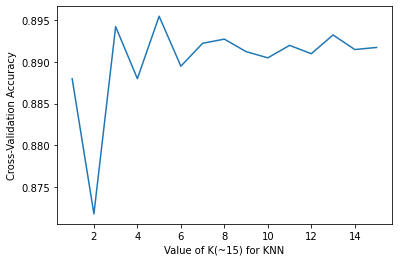

In [72]:
plt.plot(k_range[0:15], k_scores[0:15])
plt.xlabel('Value of K(~15) for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [75]:
K=5 #Best K-value
neigh = KNeighborsClassifier(n_neighbors=K)

#Classification for raw input data
neigh.fit(train_x,train_y)
y_KNN = neigh.predict(test_x)
print('Classification error of 5-NN using Raw Data:',np.sum(np.abs(y_KNN - test_y)>0)/test_y.shape[0])

#Classification PCA input data
neigh.fit(z_pca_train,train_y)
y_pca_KNN = neigh.predict(z_pca_test)
print('Classification error of 5-NN using PCA Data:',np.sum(np.abs(y_pca_KNN - test_y)>0)/test_y.shape[0])

#Classification for LDA input feature
neigh.fit(z_lda_train,train_y)
y_lda_KNN = neigh.predict(z_lda_test)
print('Classification error of 5-NN using LDA Data:',np.sum(np.abs(y_lda_KNN - test_y)>0)/test_y.shape[0])

Classification error of 5-NN using Raw Data: 0.11
Classification error of 5-NN using PCA Data: 0.107
Classification error of 5-NN using LDA Data: 0.118


## 4.3 MLP
다층 퍼셉트론(multi-layer perceptron, MLP)는 퍼셉트론으로 이루어진 층(layer) 여러 개를 순차적으로 붙여놓은 형태입니다. 다층 퍼셉트론은 피드 포워드 신경망(Feed Forward Neural Network, FFNN)의 가장 기본적인 형태입니다. 피드 포워드 신경망은 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말합니다.

In [156]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# MNIST data loading and preprocessing
train=pd.read_csv('fMNIST_AI2021.csv',header=None) #다른 헤더 정보없어서 None
train.rename(columns = {0 : 'label'}, inplace = True) #label이란것 알기 쉽게 column명 수정
train=np.array(train)
train = train[train[:,0].argsort(kind='mergesort')] # pca와 lda를 위한 데이터 정렬
train_x=train[:,1:] # data value
train_y=train[:,0] # label

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=19) 

train_x, test_x = train_x / 255.0, test_x / 255.0       # input normalization
train_y,test_y = train_y -1, test_y -1
y_train_1hot = tf.one_hot(train_y,5)                   # one-hot vector representation
y_test_1hot = tf.one_hot(test_y,5)                     # one-hot vector representation

train_x=train_x.reshape(len(train_x),28,28)
test_x=test_x.reshape(len(test_x),28,28)

In [154]:
# Define neural net model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),    # Flatten 28x28 and set input layer with 756 nodes
  tf.keras.layers.Dense(128, activation='relu'),    # First hidden layer with 128 nodes (relu activation function)  # activations: 'sigmoid','tanh', 'selu'
#   tf.keras.layers.Dropout(0.5), 
#   tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),    # Second hidden layer with 128 nodes (relu activation function)
#   tf.keras.layers.Dropout(0.5), 
#   tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(5, activation='softmax')   # Output layer with 5 nodes (activation function: 'softmax')
])

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)             # Optimization Setting
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.5)

#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])    # Learning strategy setting
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
#model.compile(loss='mse', optimizer=opt,metrics=['accuracy'])


In [155]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=2, mode='auto')
#model.fit(train_x, train_y, epochs=100, batch_size=128, callbacks=[early_stopping])# Start training
model.fit (train_x, y_train_1hot, batch_size=128, epochs=100, callbacks=[early_stopping])        # Training with "categorival coressentropy"

#model.evaluate(test_x,  test_y)          # Performance evaluation using Test data
model.evaluate(test_x,  y_test_1hot)    # Testing with "categorival coressentropy"

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8002 - accuracy: 0.6876
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8780
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2670 - accuracy: 0.9047
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2413 - accuracy: 0.9056
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.9111
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9160
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 0.9246
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1810 - accuracy: 0.9311
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.9260
Epoch 11/

[0.6700343489646912, 0.9160000085830688]

## 4.4 CNN
CNN(Convolutional Neural Network)은 이미지를 분석하기 위해 패턴을 찾는데 유용한 알고리즘으로 데이터에서 이미지를 직접 학습하고 패턴을 사용해 이미지를 분류합니다. CNN의 핵심적인 개념은 이미지의 공간정보를 유지하며 학습을 하며,CNN은 필터링 기법을 인공 신경망에 적용함으로써 이미지를 더욱 효과적으로 처리할 수 있습니다.

In [165]:
# data reshaping
train_x=train_x.reshape(len(train_x),28,28,1)
test_x=test_x.reshape(len(test_x),28,28,1)

#data shape check
np.shape(test_x)

(1000, 28, 28, 1)

In [166]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())  #Dropout 및 Batchnormalization 사용
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

#Fully connect
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_26 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 64)              

In [167]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=2, mode='auto')
model.fit(train_x, train_y, epochs=100, batch_size=128, callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 1.2043 - accuracy: 0.5035
Epoch 2/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4336 - accuracy: 0.8237
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3415 - accuracy: 0.8730
Epoch 4/100
32/32 [==============================] - 1s 44ms/step - loss: 0.3030 - accuracy: 0.8866
Epoch 5/100
32/32 [==============================] - 2s 48ms/step - loss: 0.2505 - accuracy: 0.9123
Epoch 6/100
32/32 [==============================] - 2s 49ms/step - loss: 0.2402 - accuracy: 0.9137
Epoch 7/100
32/32 [==============================] - 1s 47ms/step - loss: 0.2486 - accuracy: 0.9093
Epoch 8/100
32/32 [==============================] - 2s 47ms/step - loss: 0.1987 - accuracy: 0.9347
Epoch 9/100
32/32 [==============================] - 2s 55ms/step - loss: 0.1968 - accuracy: 0.9291
Epoch 10/100
32/32 [==============================] - 2s 47ms/step - loss: 0.1795 - accuracy: 0.9391

In [168]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)

32/32 - 0s - loss: 0.3955 - accuracy: 0.9280


# 4.5 AutoEncoder 

## Autoencoder란?

딥러닝에서의 비지도 학습이라고 할 수 있는 AutoEncoder는 출력이 입력과 동일한 특수한 유형의 신경망 아키텍처입니다.어떻게 보면 간단한 Neural Network처럼 보이지만 Network에 여러가지 방법으로 제약을 줌으로써 어려운 신경망으로 만듭니다. 아래 Usecase에서 시행될 내용으로 hidden layer의 뉴런 수를 input layer(입력층)보다 작게해서 데이터를 압축(차원 축소)한다거나, 입력 데이터에 노이즈(noise)를 추가한 후 원본 입력을 복원할 수 있도록 네트워크를 학습시키는 AutoEncoder가 있습니다. 그 외에도 여러 AutoEncoder가 있지만 이 두가지만 사용해볼 예정입니다.AutoEncoder의 이러한 제약들은 단순히 input을 바로 output으로 내보내지 못하게 하여,데이터를 효율적으로 표현하는 방법을 학습하도록 제어합니다.

일반적인 AutoEncoder Architecture는 다음과 같은 세 가지 주요 구성 요소로 이루어집니다.
- Encoding Architecture : 인코더 아키텍처는 노드 수가 감소(ex)1500->1000->500)하고 궁극적으로 Latent View Representation으로 감소하는 일련의 계층으로 구성됩니다.
- Latent View Repersentation: latent view는 input이 감소되고 정보가 보존되는 가장 낮은 level입니다.
- Decoding Architecture: 디코딩 아키텍처는 인코딩 아키텍처의 미러 이미지이지만(node수 반전형태처럼 같아야함), 모든 계층의 노드 수가 증가(ex)500->1000->1500)하고 궁극적으로 거의 유사한 입력을 출력합니다.
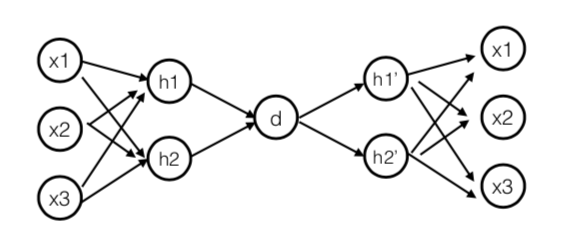

AutoEncoder는 첫 번째 Layer에서 전달된 동일한 input을 재구성할 수 있어야 합니다. AutoEncoder는 이미지 데이터와 함께 널리 사용되며, 활용예시는 아래와 같습니다.

- 차원 축소(Dimention Reduction)
- 이미지 압축(Image Comprehension)
- 이미지 노이즈 제거(Image Denoising)
- 이미지 생성(Image Generation)
- 특징 추출(Feature Extraction)

## Autoencoder 수식과 작동원리

<div>
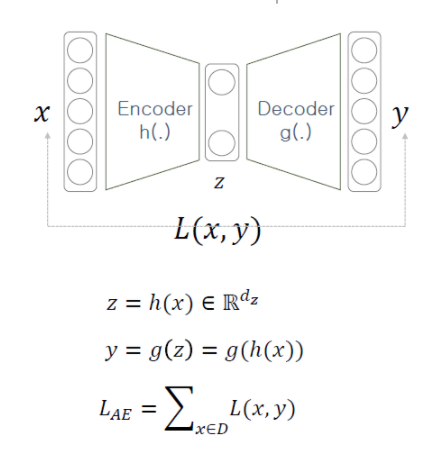
</div>

#### 수식
- Input Data를 Encoder Network에 통과시켜 압축된 z값을 얻습니다
- 압축된 z vector로부터 Input Data와 같은 크기의 출력 값을 생성합니다
- 이때 Loss값은 입력값 x와 Decoder를 통과한 y값의 차이입니다

#### 작동원리
AutoEncoder는 위의 그림에서 처럼, 입력과 출력층의 노드 수가 동일하다는 것만 제외하면 일반적인 MLP(Multi-Layer Perceptron)과 동일한 구조입니다. AutoEncoder는 입력을 재구성하기 때문에 출력을 재구성(reconstruction)이라고도 하며, loss-function은 입력과 출력(재구성)의 차이를 가지고 계산합니다. 

위 그림의 AutoEncoder는 hidden layer의 노드가 input layer보다 작으므로 input이 저차원으로 표현되는데, 저차원을 가지는 hidden layer에 의해 입력을 그대로 출력으로 복사할 수 없기 때문에, 출력이 입력과 최대한 비슷하게 출력하기 위해 학습해야 합니다. 이러한 학습을 통해 AutoEncoder는 입력데이터에서 가장 중요한 Feature(특징)을 학습하도록 만듭니다.



## AutoEncoder Usecase  
### UseCase 1 : Image Reconstruction
필요한 라이브러리를 로드합니다.

In [32]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np


#### Dataset Prepration

In [33]:
train = pd.read_csv('fMNIST_AI2021.csv',header=None)
train.rename(columns = {0 : 'label'}, inplace = True)
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## 예측 변수를 정규화하고 재구성
train_x = train_x / 255

## 훈련 및 검증 데이터 세트를 생성 (test:train=2:8로 나누어 줌)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## 입력을 재구성
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [34]:
#label 당 fashion 종류매칭
labeldict = {
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal'
}

#### Create Autoencoder architecture
AutoEncoder Architecture를 생성하겠습니다. 인코딩 부분은 1500, 1000, 500개의 노드가 있는 세 개의 계층으로 구성됩니다. 인코딩 아키텍처는 5개의 노드로 구성된 latent view에 연결되며, 이후 500, 1000 ,1500개의 노드로 디코딩 아키텍처에 연결됩니다. output layer는 input layer와 같은 정확한 노드 수로 구성됩니다.

In [35]:
# 입력 계층
input_layer = Input(shape=(784,))

# 인코딩 아키텍처
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

# latent view
latent_view   = Dense(5, activation='sigmoid')(encode_layer3)

# 디코딩 아키텍처
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

# 출력 계층
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 2505      
_________________________________________________________________
dense_9 (Dense)              (None, 500)               3000      
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              501000

다음으로 EarlyStopping Callback으로 모델을 학습하겠습니다.

In [37]:
#loss값은 MSE
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
#batchsize 128, epoch는 20, callback함수로는 early_stopping으로 조정해주었습니다.
model.fit(train_x, train_x, epochs=20, batch_size=128, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
32/32 [==============================] - 8s 210ms/step - loss: 0.1081 - val_loss: 0.0568
Epoch 2/20
32/32 [==============================] - 3s 102ms/step - loss: 0.0533 - val_loss: 0.0373
Epoch 3/20
32/32 [==============================] - 3s 88ms/step - loss: 0.0374 - val_loss: 0.0333
Epoch 4/20
32/32 [==============================] - 3s 89ms/step - loss: 0.0337 - val_loss: 0.0312
Epoch 5/20
32/32 [==============================] - 3s 89ms/step - loss: 0.0316 - val_loss: 0.0287
Epoch 6/20
32/32 [==============================] - 3s 88ms/step - loss: 0.0296 - val_loss: 0.0277
Epoch 7/20
32/32 [==============================] - 3s 89ms/step - loss: 0.0281 - val_loss: 0.0263
Epoch 8/20
32/32 [==============================] - 3s 88ms/step - loss: 0.0267 - val_loss: 0.0248
Epoch 9/20
32/32 [==============================] - 3s 88ms/step - loss: 0.0251 - val_loss: 0.0253
Epoch 10/20
32/32 [==============================] - 3s 88ms/step - loss: 0.0247 - val_loss: 0.0231
Epoch 1

검증 데이터에 대한 예측값을 생성합니다.

In [38]:
preds = model.predict(val_x)

원본(input data) 및 예측된 이미지(output data)를 플롯합니다.

Input(입력): 원본데이터

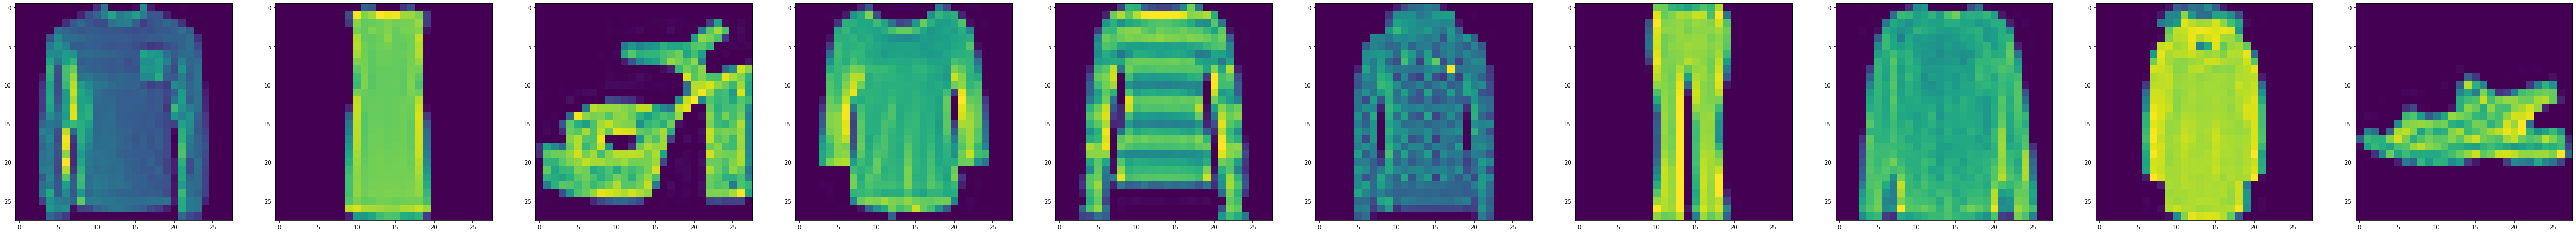

In [39]:
from PIL import Image
f,ax = plt.subplots(1,10)
f.set_size_inches(80,40)
for i in range(10):
    ax[i].imshow(val_x[i].reshape(28,28))
plt.show()

Output(출력): AutoEncoder학습 결과

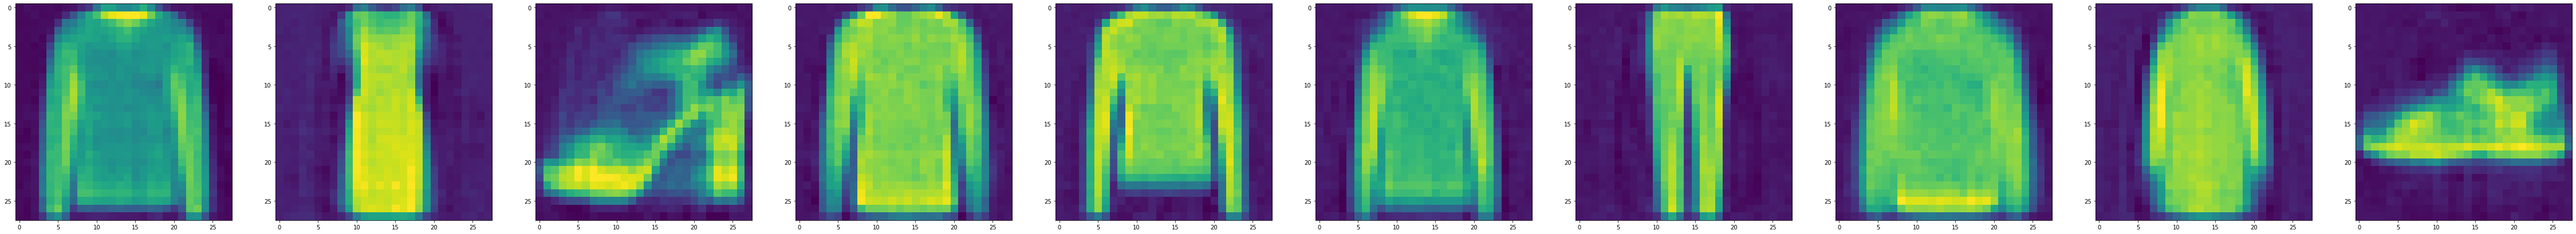

In [40]:
from PIL import Image
f,ax = plt.subplots(1,10)
f.set_size_inches(80,40)
for i in range(10):
    ax[i].imshow(preds[i].reshape(28,28))
plt.show()

위 결과로 epoch=20개,batchsize=128로 학습된 AutoEncoder가 입력데이터(이미지)를 매우 잘 재구성(reconstruction)할 수 있다는 것을 확인할 수 있습니다. 


아래에서는 AutoEncoder 다른 활용예시로서 - 이미지 노이즈 제거에 대해 살펴보겠습니다.

### UseCase 2 - Image Denoising
입력데이터(이미지)에 노이즈(noise)가 포함되어 있는 경우 AutoEncdoer를 활용하여 노이즈를 제거할 수 있습니다.  

In [41]:
## train_x 어레이 및 val_x 어레이를 재생성(test:train=2:8)
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x,test_size=0.2)

# 정규화(normalization) 및 재구성
train_x = train_x / 255.
val_x = val_x / 255.

이 AutoEncoder에는 convolution network가 데이터(Image)에 적합해 convolution layer를 추가할 것입니다. 이미지 데이터에 convolution을 적용하기 위해 28 * 28 matrix 형식으로 입력을 재구성합니다. 

In [42]:
train_x = train_x.reshape(-1,28,28,1) # -1 ~ 1 사이의 값
val_x = val_x.reshape(-1,28,28,1)

#### Noisy Images
이미지에 노이즈를 의도적으로 추가합니다.imag package를 쓰면 이미지에 다양한 변화를 줄 수 있는데 지금은 이 패키지로 이미지에 noise를 주겠습니다.
노이즈에 여러 유형이 있는데, 아래와 같은 유형이 있습니다.

- Salt and Pepper Noise
- Gaussian Noise
- Periodic Noise
- Speckle Noise  
  
Gaussian Noise를 주로 쓰지만 여기선 데이터에 Salt and Pepper Noise를 적용하겠습니다. noise 추가시 아래와 같이 점점이 콕콕 박혀있는걸 볼 수 있습니다.

In [43]:
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x*255)/255
val_x_n = seq_object.augment_images(val_x*255)/255

noise를 추가하기 전

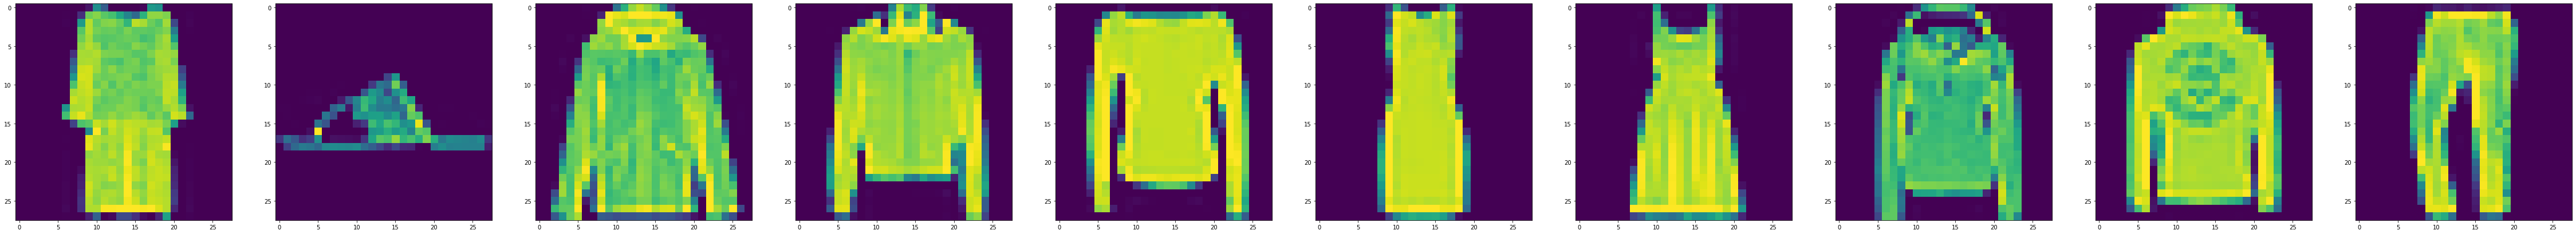

In [44]:
f, ax = plt.subplots(1,10)
f.set_size_inches(80, 40)
for i in range(10,20):
    ax[i-10].imshow(train_x[i].reshape(28, 28))
plt.show()

noise를 추가한 후

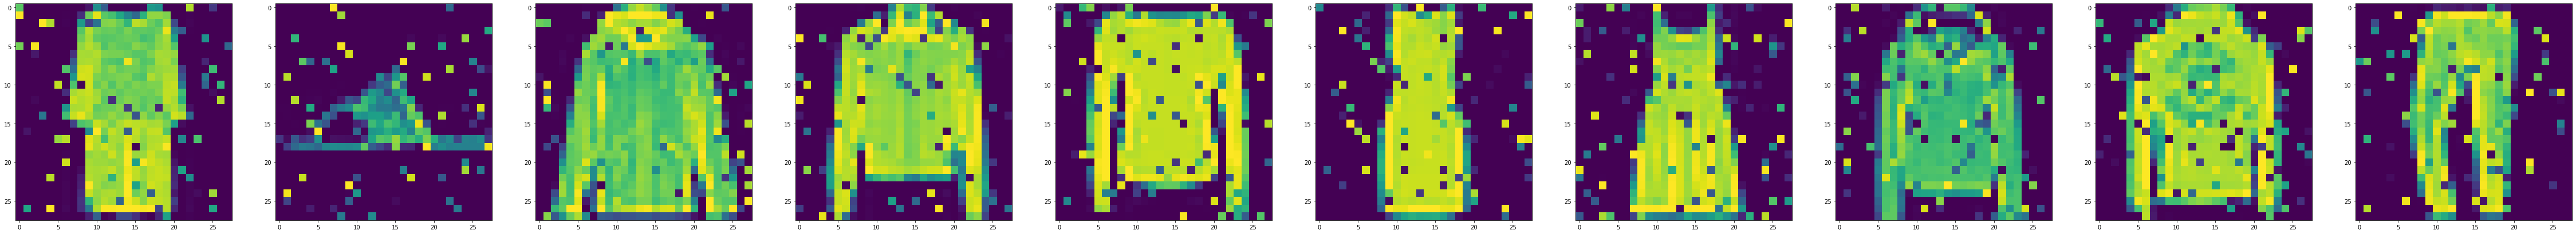

In [45]:
f, ax = plt.subplots(1,10)
f.set_size_inches(80, 40)
for i in range(10,20):
    ax[i-10].imshow(train_x_n[i].reshape(28, 28))
plt.show()

이제 AutoEncoder Architecture를 생성하겠습니다.

#### Encoding Architecture:
인코딩 아키텍처는 3개의 convolution layer와 3개의 Max pooling layer가 하나씩 쌓여서 구성됩니다. activation function으로는 Relu를 사용, padding은 "same"로 유지됩니다. Max pooling layer은 이미지 차원을 축소합니다. 이 layer는 max filter를 원본이미지의 overlapping되지않은 부분에 적용합니다.

#### Decoding Architecture:
디코딩 아키텍처에서도 마찬가지로, convolution layer은 인코딩 아키텍처와 동일한 차원(대신 반대로 16->32->64)을 가지고 사용됩니다. 하지만 3개의 Max pooling layer 대신 3개의 UpSampling layer를 사용합니다. activation function은 똑같이 Relu로, padding도 'same'으로 같습니다. UpSampling의 역할은 입력 벡터의 치수를 고차원(고해상도)으로 UpSampling하는 것입니다. Max pooling은 되돌릴 수 없지만 각 pooling 영역 내 maxima의 위치를 기록하면 대략적인 근사치를 얻을 수 있습니다.이를 통해 Umsampling layer는 저차원을 재구성(reconstruction)합니다.

In [46]:
# 입력 계층
input_layer = Input(shape=(28, 28, 1))

# 인코딩 아키텍처
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# 디코딩 아키텍처
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [47]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0   

earlystopping callback으로 모델을 학습합니다.여기선 epoch=10으로도 좋은 성능을 낸 것 같아서 멈췄습니다만 더 좋은 결과를 위해선 epoch수를 늘리면 됩니다. 대신 과적합 주의!!

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=128, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
32/32 [==============================] - 16s 436ms/step - loss: 0.0954 - val_loss: 0.0461
Epoch 2/10
32/32 [==============================] - 13s 420ms/step - loss: 0.0416 - val_loss: 0.0338
Epoch 3/10
32/32 [==============================] - 13s 420ms/step - loss: 0.0321 - val_loss: 0.0288
Epoch 4/10
32/32 [==============================] - 13s 420ms/step - loss: 0.0279 - val_loss: 0.0253
Epoch 5/10
32/32 [==============================] - 13s 421ms/step - loss: 0.0244 - val_loss: 0.0228
Epoch 6/10
32/32 [==============================] - 14s 426ms/step - loss: 0.0225 - val_loss: 0.0212
Epoch 7/10
32/32 [==============================] - 14s 434ms/step - loss: 0.0212 - val_loss: 0.0204
Epoch 8/10
32/32 [==============================] - 14s 424ms/step - loss: 0.0205 - val_loss: 0.0200
Epoch 9/10
32/32 [==============================] - 14s 423ms/step - loss: 0.0195 - val_loss: 0.0193
Epoch 10/10
32/32 [==============================] - 14s 424ms/step - loss: 0.0192 - val_lo

모형의 예측값을 구합니다.

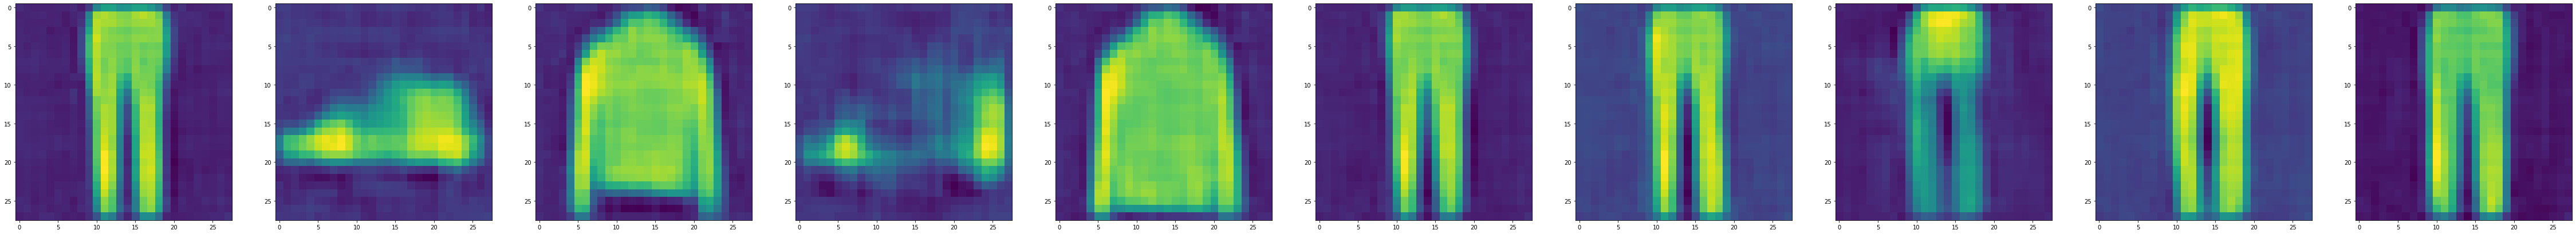

In [49]:
preds = model_2.predict(val_x_n[:20])
f, ax = plt.subplots(1,10)
f.set_size_inches(80, 40)
for i in range(10,20):
    ax[i-10].imshow(preds[i].reshape(28, 28))
plt.show()

보시면 noise가 추가된 dataset이 깔끔하게 특징만 추출된 것을 확인 할 수 있습니다. 